In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
START = "2017-01-01"
END = "2020-06-30"

In [3]:
india_stations_df = pd.read_pickle('./india_stations.pkl')
india_stations_df.head()

,StationName,StationId,City,Latitude,Longitude
0,"Secretariat, Amaravati - APPCB",AP001,Amaravati,16.504562,80.523517
1,"GVM Corporation, Visakhapatnam - APPCB",AP005,Visakhapatnam,17.748887,83.247789
2,"Railway Colony, Guwahati - APCB",AS001,Guwahati,26.179587,91.784315
3,"DRM Office Danapur, Patna - BSPCB",BR005,Patna,25.585624,85.044299
4,"Govt. High School Shikarpur, Patna - BSPCB",BR006,Patna,25.587980,85.094986


In [4]:
pm25_data_df = pd.read_csv('./station_day.csv')
pm25_data_df['Date'] = pd.to_datetime(pm25_data_df['Date'], format="%Y-%m-%d")

pm25_data_df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [5]:
station_ids = india_stations_df['StationId'].values
station_pm25_df_list = []

for station_id in station_ids:
    df = pm25_data_df[pm25_data_df['StationId'] == station_id][['StationId', 'Date', 'PM2.5']]
    df = df[(df['Date'] >= START) & (df['Date'] <= END)].reset_index(drop=True).set_index('Date')
    
    nan_count = df['PM2.5'].isna().sum()
    
    if nan_count < (0.3 * len(df)):
        station_pm25_df_list.append(df)

In [6]:
import pickle

with open(f'./india_stations_pm25.pkl', 'wb') as file:
    pickle.dump(station_pm25_df_list, file, protocol=4)

In [7]:
idx = np.random.randint(1, len(station_pm25_df_list))
df = station_pm25_df_list[idx]
name = india_stations_df[india_stations_df['StationId'] == df['StationId'].values[0]]['StationName'].values[0]

In [8]:
station_pm25_df_list[0].head()

,StationId,PM2.5
Date,,
2017-11-24,AP001,71.36
2017-11-25,AP001,81.40
2017-11-26,AP001,78.32
2017-11-27,AP001,88.76
2017-11-28,AP001,64.18


In [9]:
len(station_pm25_df_list)

97

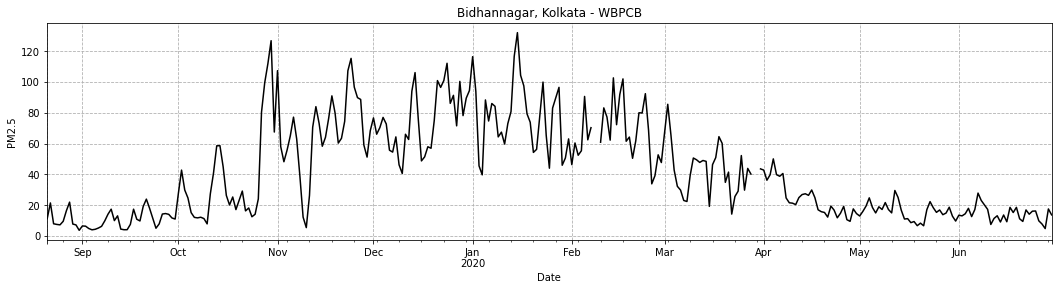

In [10]:
plt.figure(figsize=(18, 4))
df['PM2.5'].plot(c='k')
plt.title(name)
plt.ylabel('PM2.5')
plt.grid(ls='--')
plt.show()